In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '../Code')

from utility_functions import *
from weight_matrix import *
from parameters import *
from sim_network_EI import sim_network_Perturb
from scipy.special import lambertw, exp1, expi, hyp2f1, gamma, gammaincc
from scipy import optimize, integrate
import mpmath as mp
from natsort import natsorted
from glob import glob
from phi import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
# from hmmlearn import hmm


In [2]:
# V-alpha plane
theta = 1.0
alpha0 = np.arange(0.01, 1.01, 0.01)
alpha1 = np.arange(1.0, 5.01, 0.01)
Vbar0 = 2 * theta / (alpha0 + 1)
Vbar1 = ((alpha1-1)/(alpha1+1))**(1/ alpha1) + theta

In [3]:
# E-J Plane
alpha_sub = np.arange(0.0, 1.0, 0.1)
alpha_sup = np.arange(1.5, 5.1, 0.5)
E_fixed = 1.5
J = np.arange(-2.0, 8.01, 0.01)
E_plot_sub = np.zeros((len(alpha_sub), len(J)))
E_plot_sup = np.zeros((len(alpha_sup), len(J)))
g_plot_sup = np.zeros((len(alpha_sup), len(J)))

for i in range(len(alpha_sub)):
    E_plot_sub[i,:] = -(J * ((alpha_sub[i]+theta)/(alpha_sub[i]+1))**alpha_sub[i] - (((alpha_sub[i]+theta)/(alpha_sub[i]+1))**alpha_sub[i] + 1) * (2 * theta / (alpha_sub[i]+1)))

for i in range(len(alpha_sup)):
    E_plot_sup[i,:] = -(J * ((alpha_sup[i]-1)/(alpha_sup[i]+1)) - (((alpha_sup[i]-1)/(alpha_sup[i]+1))**(1/alpha_sup[i]) + theta) * (2 * alpha_sup[i] / (alpha_sup[i]+1)))
    g_plot_sup[i,:] = 1 + (1 / (J * ((alpha_sup[i]-1)/(alpha_sup[i]+1))) ) * (E_fixed - (((alpha_sup[i]-1)/(alpha_sup[i]+1))**(1/alpha_sup[i]) + theta) * (2 * alpha_sup[i] / (alpha_sup[i]+1)))


In [4]:
# Phase plot for alpha = 2
J_test = np.arange(0.0, 8.01, 0.01)
a2 = -27
b2 = 36 * (J_test + 2) * (J_test + 1) - 4 * (J_test + 2)**3 - 54 * J_test
c2 = 36 * J_test * (J_test + 1) * (J_test + 2) - 4 * J_test * (J_test + 2)**3 + 4 * (J_test + 2)**2 * (J_test + 1)**2 - 32 * (J_test + 1)**3 - 27 * J_test**2

E_plot_A2_Plus = (-b2 + np.sqrt(b2**2 - 4 * a2 * c2)) / (2 * a2)
E_plot_A2_Minus = (-b2 - np.sqrt(b2**2 - 4 * a2 * c2)) / (2 * a2)

/var/folders/7x/_g6cnzvd605glvq83cdzyh1r0000gn/T/ipykernel_43050/3441588343.py:7: RuntimeWarning: invalid value encountered in sqrt
  E_plot_A2_Plus = (-b2 + np.sqrt(b2**2 - 4 * a2 * c2)) / (2 * a2)
/var/folders/7x/_g6cnzvd605glvq83cdzyh1r0000gn/T/ipykernel_43050/3441588343.py:8: RuntimeWarning: invalid value encountered in sqrt
  E_plot_A2_Minus = (-b2 - np.sqrt(b2**2 - 4 * a2 * c2)) / (2 * a2)


In [5]:
E_plot = np.arange(0.0, 2.1, 0.1)
J_plot = np.arange(0.0, 5.1, 0.2)
g_plot = np.arange(0.0, 1.1, 0.1)

In [6]:
J_Inset = np.arange(2.70, 3.21, 0.10).round(2)
E_Inset = np.arange(1.01, 1.09, 0.01).round(2)

In [7]:
filename = '../Data/Figure 6/100Data_TPL2.npz'
data = np.load(filename)

fr_Sim_L_EJ = data['arr_0']
fr_Sim_H_EJ = data['arr_1']

fr_MF_L_EJ = data['arr_2']
fr_MF_H_EJ = data['arr_3']

# fr_Sim_H_EJ = np.flip(fr_Sim_H_EJ.reshape((len(E_plot), len(J_plot))), axis=0)
# fr_MF_H_EJ = np.flip(fr_MF_H_EJ.reshape((len(E_plot), len(J_plot))), axis=0)

fr_Sim_L_EJ = np.flip(fr_Sim_L_EJ.reshape((len(E_plot), len(J_plot))), axis=0)
fr_MF_L_EJ = np.flip(fr_MF_L_EJ.reshape((len(E_plot), len(J_plot))), axis=0)

fr_Sim_H_EJ = fr_Sim_H_EJ.reshape((len(E_plot), len(J_plot)))
fr_MF_H_EJ = fr_MF_H_EJ.reshape((len(E_plot), len(J_plot)))

In [8]:
filename = '../Data/Figure 6/100_Inset_TPL2.npz'
# filename = '../Data/100_Inset_TPL2.npz'
data = np.load(filename)

fr_Sim_L_Inset = data['arr_0']
fr_MF_L_Inset = data['arr_1']

fr_Sim_L_EJ = np.flip(fr_Sim_L_EJ, axis=0)
fr_MF_L_EJ = np.flip(fr_MF_L_EJ, axis=0)

In [9]:
filename = '../Data/Figure 6/300Data_TPL2_Jg.npz'
data = np.load(filename)

fr_Sim_L_Jg = data['arr_0']
fr_Sim_H_Jg = data['arr_1']

fr_MF_L_Jg = data['arr_2']
fr_MF_H_Jg = data['arr_3']

fr_Sim_H_Jg = np.flip(fr_Sim_H_Jg.reshape((len(g_plot), len(J_plot))), axis=1)
fr_MF_H_Jg = np.flip(fr_MF_H_Jg.reshape((len(g_plot), len(J_plot))), axis=1)

fr_Sim_L_Jg = fr_Sim_L_Jg.reshape((len(g_plot), len(J_plot)))
fr_MF_L_Jg = fr_MF_L_Jg.reshape((len(g_plot), len(J_plot)))

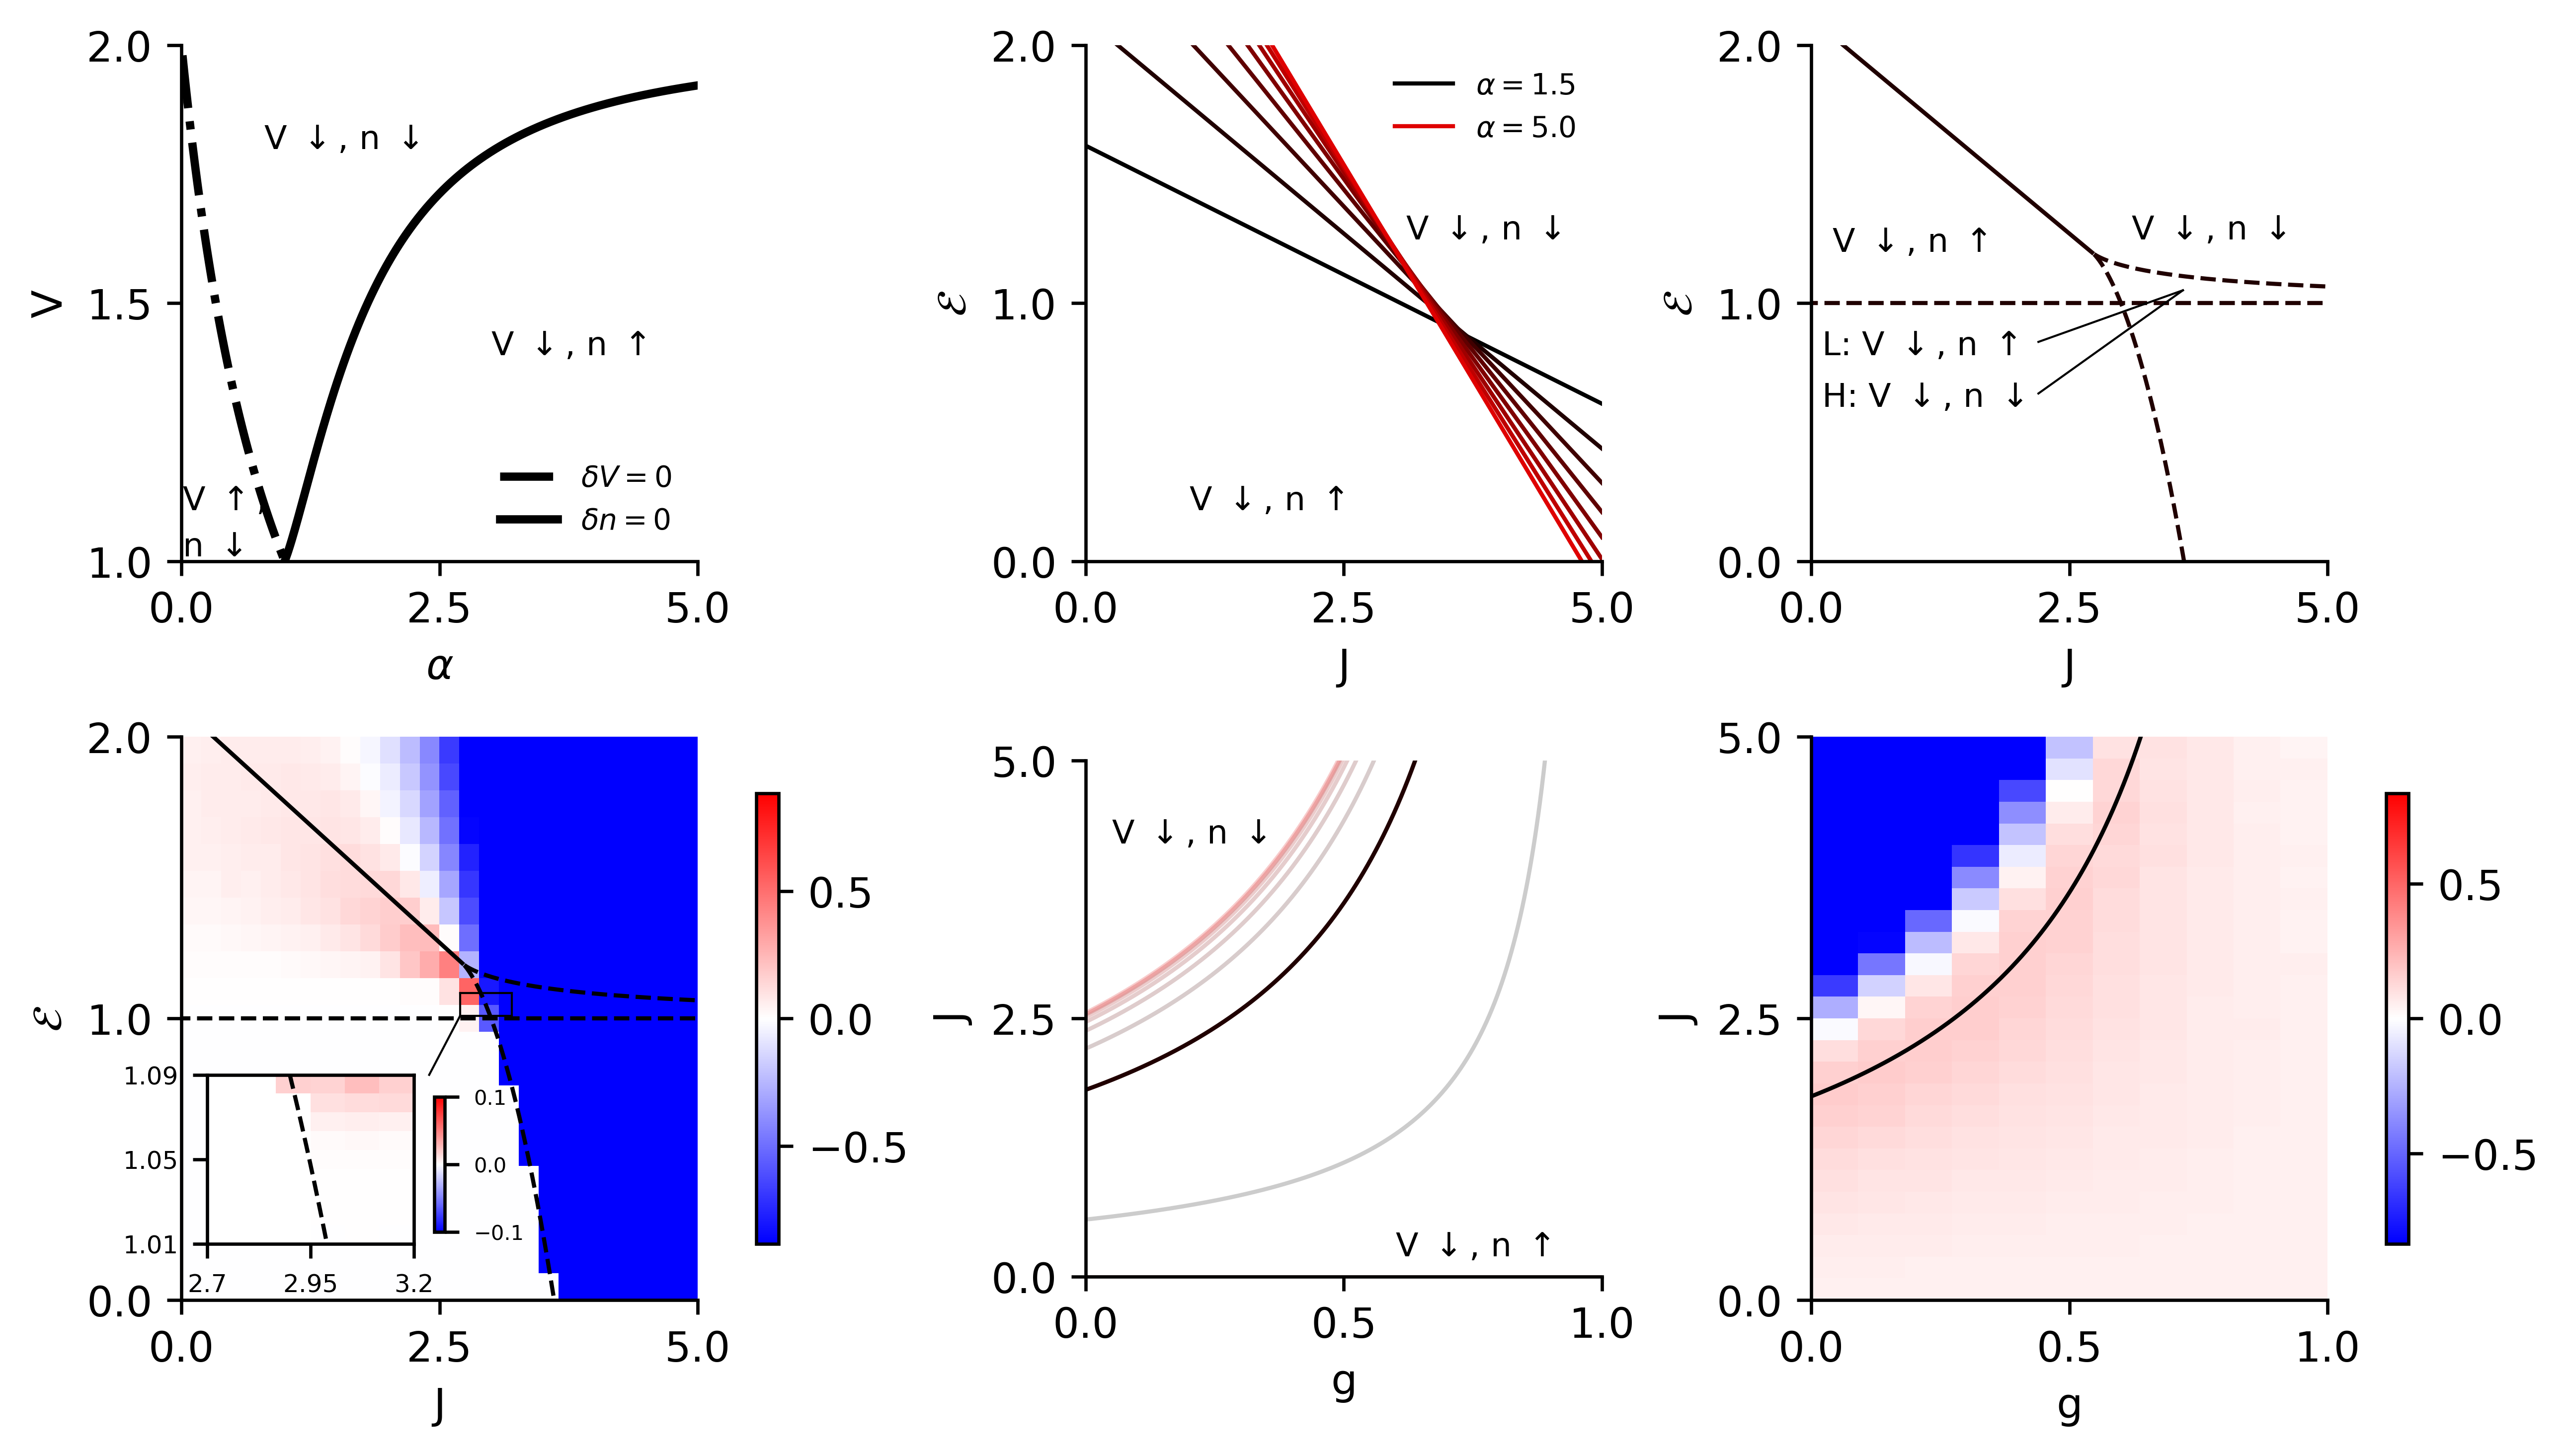

In [10]:
COLOR = (0., 0., 0.)

def color_conv(color_range):
    return (COLOR[0] + color_range, COLOR[1], COLOR[2]) 
    
fontsize=10
J_limL = -2.0
J_limH = 8.0
E_limL = 0.5
E_limH = 1.5

f, ax = plt.subplots(2,3,figsize=(8.5,4.8),dpi=600,layout='constrained')

ax[0, 0].plot(alpha0, Vbar0, '-.k', linewidth=2, label='$\\delta V = 0$')
ax[0, 0].plot(alpha1, Vbar1, '-k', linewidth=2, label='$\\delta n = 0$')
ax[0, 0].set_xlabel('$\\alpha$')
ax[0, 0].set_ylabel('V')
ax[0, 0].text(3.0, 1.4, 'V $\\downarrow$, n $\\uparrow$', fontsize=8)
ax[0, 0].text(0.8, 1.8, 'V $\\downarrow$, n $\\downarrow$', fontsize=8)
ax[0, 0].text(0.01, 1.1, 'V $\\uparrow$,', fontsize=8)
ax[0, 0].text(0.01, 1.01, 'n $\\downarrow$', fontsize=8)
xticks = [0.0, 2.5, 5.0]
yticks = [1.0, 1.5, 2.0]
ax[0, 0].set_xticks(xticks, xticks, fontsize=fontsize)
ax[0, 0].set_yticks(yticks, yticks, fontsize=fontsize)
ax[0, 0].set_xlim(xticks[0], xticks[-1])
ax[0, 0].set_ylim(yticks[0], yticks[-1])
ax[0, 0].legend(frameon=False, loc='lower right',fontsize=7)
ax[0, 0].set_aspect(1./ax[0,0].get_data_ratio())


tt = 1 / len(alpha_sup)
for i in range(len(alpha_sup)):
    if i == 0 or i == len(alpha_sup)-1:
        ax[0, 1].plot(J, E_plot_sup[i,:], color=color_conv(i*tt), linewidth=1,label='$\\alpha=$'+str(alpha_sup[i]))
    else:
        ax[0, 1].plot(J, E_plot_sup[i,:], color=color_conv(i*tt), linewidth=1)
    
ax[0, 1].set_xlabel('J', fontsize=fontsize)
ax[0, 1].set_ylabel('$\\mathcal{E}$', fontsize=fontsize)
ax[0, 1].text(1.0, 0.20, 'V $\\downarrow$, n $\\uparrow$', fontsize=8)
ax[0, 1].text(3.1, 1.25, 'V $\\downarrow$, n $\\downarrow$', fontsize=8)
xticks = [0.0, 2.5, 5.0]
yticks = [0.0, 1.0, 2.0]
ax[0, 1].set_xlim(xticks[0], xticks[-1])
ax[0, 1].set_ylim(yticks[0], yticks[-1])
ax[0, 1].set_xticks(xticks, xticks, fontsize=fontsize)
ax[0, 1].set_yticks(yticks, yticks, fontsize=fontsize)
ax[0, 1].legend(frameon=False, loc='upper right',fontsize=7)
ax[0, 1].set_aspect(1./ax[0,1].get_data_ratio())


idx = np.where(np.abs(alpha_sup - 2.0) < 10e-4)[0][0]
E_cusp = 1 + ((2.0 - 1)/(2.0 + 1))**((1+2.0)/2.0)
idxStop = np.where(np.abs(E_plot_sup[idx,:] - E_cusp) < 10e-4)[0][0]
E_plot_sup[idx, idxStop:] = np.nan
ax[0, 2].plot(J, E_plot_sup[idx,:], color=color_conv(idx*tt), linewidth=1)
ax[0, 2].plot(J_test, E_plot_A2_Plus, color=color_conv(idx*tt), linewidth=1, linestyle='dashed')
ax[0, 2].plot(J_test, E_plot_A2_Minus, color=color_conv(idx*tt), linewidth=1, linestyle='dashed')
ax[0, 2].hlines(1.0, J_limL, J_limH, color=color_conv(idx*tt), linewidth=1, linestyle='dashed')    
ax[0, 2].set_xlabel('J', fontsize=fontsize)
ax[0, 2].set_ylabel('$\\mathcal{E}$', fontsize=fontsize)
ax[0, 2].text(0.2, 1.20, 'V $\\downarrow$, n $\\uparrow$', fontsize=8)
ax[0, 2].text(3.1, 1.25, 'V $\\downarrow$, n $\\downarrow$', fontsize=8)
ax[0, 2].text(0.1, 0.80, 'L: V $\\downarrow$, n $\\uparrow$', fontsize=8)
ax[0, 2].text(0.1, 0.60, 'H: V $\\downarrow$, n $\\downarrow$', fontsize=8)
ax[0, 2].plot([3.6, 2.2], [1.05, 0.85], '-k', linewidth=0.5)
ax[0, 2].plot([3.6, 2.2], [1.05, 0.65], '-k', linewidth=0.5)
xticks = [0.0, 2.5, 5.0]
yticks = [0.0, 1.0, 2.0]
ax[0, 2].set_xlim(xticks[0], xticks[-1])
ax[0, 2].set_ylim(yticks[0], yticks[-1])
ax[0, 2].set_xticks(xticks, xticks, fontsize=fontsize)
ax[0, 2].set_yticks(yticks, yticks, fontsize=fontsize)
ax[0, 2].set_aspect(1./ax[0,2].get_data_ratio())


cmax = np.amax(np.abs(fr_Sim_H_EJ - fr_MF_H_EJ)) / 10
dE = E_plot[1] - E_plot[0]
dJ = J_plot[1] - J_plot[0]
Emin = E_plot[0]
Emax = E_plot[-1]
Jmin = J_plot[0]
Jmax = J_plot[-1]
im1 = ax[1, 0].imshow(fr_Sim_H_EJ - fr_MF_H_EJ, origin='lower', extent=(Jmin, Jmax, Emin, Emax), clim=(-cmax, cmax), cmap='bwr', aspect='auto')
f.colorbar(im1, ax=ax[1,0], shrink=0.8)
ax[1, 0].plot(J_test, E_plot_A2_Plus, color='k', linewidth=1, linestyle='dashed')
ax[1, 0].plot(J_test, E_plot_A2_Minus, color='k', linewidth=1, linestyle='dashed')
ax[1, 0].hlines(1.0, J_limL, J_limH, color='k', linewidth=1, linestyle='dashed')
ax[1, 0].plot(J, E_plot_sup[1,:], 'k', linewidth=1)
ax[1, 0].set_xlabel('J', fontsize=fontsize)
ax[1, 0].set_ylabel('$\\mathcal{E}$', fontsize=fontsize)
# ax[1, 0].set_aspect(1./ax[1,0].get_data_ratio())
xticks = [0.0, 2.5, 5.0]
yticks = [0.0, 1.0, 2.0]
ax[1, 0].set_xticks(xticks, xticks, fontsize=fontsize)
ax[1, 0].set_yticks(yticks, yticks, fontsize=fontsize)
ax[1, 0].set_xlim(Jmin, Jmax)
ax[1, 0].set_ylim(Emin, Emax)
ax[1, 0].plot([2.7, 2.7], [1.01, 1.09], '-k', linewidth=0.5)
ax[1, 0].plot([3.2, 3.2], [1.01, 1.09], '-k', linewidth=0.5)
ax[1, 0].plot([2.7, 3.2], [1.01, 1.01], '-k', linewidth=0.5)
ax[1, 0].plot([2.7, 3.2], [1.09, 1.09], '-k', linewidth=0.5)
ax[1, 0].plot([2.7, 2.4], [1.01, 0.80], '-k', linewidth=0.5)

cmax = np.amax(np.abs(fr_Sim_L_Inset - fr_MF_L_Inset)) / 100
dE_Inset = E_Inset[1] - E_Inset[0]
dJ_Inset = J_Inset[1] - J_Inset[0]
Emin_Inset = E_Inset[0]
Emax_Inset = E_Inset[-1]
Jmin_Inset = J_Inset[0]
Jmax_Inset = J_Inset[-1] 
inset_ax = ax[1, 0].inset_axes([0.05, 0.1, 0.4, 0.3])
im2 = inset_ax.imshow(fr_Sim_L_Inset - fr_MF_L_Inset, origin='lower', extent=(Jmin_Inset, Jmax_Inset, Emin_Inset, Emax_Inset), clim=(-cmax, cmax), cmap='bwr', aspect='auto')
cax = inset_ax.inset_axes([1.1, 0.07, 0.05, 0.8])
cbar = f.colorbar(im2, cax=cax)
cbar.ax.tick_params(labelsize=5)
inset_ax.plot(J_test, E_plot_A2_Plus, color='k', linewidth=1, linestyle='dashed')
inset_ax.plot(J_test, E_plot_A2_Minus, color='k', linewidth=1, linestyle='dashed')
inset_ax.hlines(1.0, J_limL, J_limH, color='k', linewidth=1, linestyle='dashed')
inset_ax.plot(J, E_plot_sup[1,:], 'k', linewidth=1)
xticks = [2.7, 2.95, 3.2]
yticks = [1.01, 1.05, 1.09]
inset_ax.set_xticks(xticks, xticks, fontsize=6)
inset_ax.set_yticks(yticks, yticks, fontsize=6)
inset_ax.set_xlim(Jmin_Inset, Jmax_Inset)
inset_ax.set_ylim(Emin_Inset, Emax_Inset)
# inset_ax.yaxis.tick_right()
# inset_ax.xaxis.tick_top()
# divider = make_axes_locatable(inset_ax)
# cax = divider.new_vertical(size="1%", pad=-0.7, pack_start=True)
# f.add_axes(cax)
# f.colorbar(im1, cax=cax, orientation="horizontal")


tt = 1 / len(alpha_sup)
for i in range(len(alpha_sup)):
    if i == 0 or i == len(alpha_sup)-1:
        ax[1, 1].plot(g_plot_sup[i,:], J, color=color_conv(i*tt), linewidth=1, alpha=0.2, label='$\\alpha=$'+str(alpha_sup[i]))
    else:
        ax[1, 1].plot(g_plot_sup[i,:], J, color=color_conv(i*tt), linewidth=1, alpha=0.2)

    if np.abs(alpha_sup[i] - 2.0) < 10e-4:
        ax[1, 1].plot(g_plot_sup[i,:], J, color=color_conv(i*tt), linewidth=1)
        
ax[1, 1].text(0.6, 0.2, 'V $\\downarrow$, n $\\uparrow$', fontsize=8)
ax[1, 1].text(0.05, 4.2, 'V $\\downarrow$, n $\\downarrow$', fontsize=8)
ax[1, 1].set_xlabel('g', fontsize=fontsize)
ax[1, 1].set_ylabel('J', fontsize=fontsize)
xticks = [0.0, 0.5, 1.0]
yticks = [0.0, 2.5, 5.0]
ax[1, 1].set_xticks(xticks, xticks, fontsize=fontsize)
ax[1, 1].set_yticks(yticks, yticks, fontsize=fontsize)
ax[1, 1].set_xlim(xticks[0], xticks[-1])
ax[1, 1].set_ylim(yticks[0], yticks[-1])
ax[1, 1].set_aspect(1./ax[1,1].get_data_ratio())


# tt = 1 / len(alpha_sub)
# for i in range(len(alpha_sub)):
#     if i == 0 or i == len(alpha_sub)-1:
#         ax[1, 0].plot(J, E_plot_sub[i,:], color=color_conv(i*tt), linewidth=1, linestyle='dashdot', label='$\\alpha=$'+str(alpha_sub[i].round(1)))
#     else:
#         ax[1, 0].plot(J, E_plot_sub[i,:], color=color_conv(i*tt), linewidth=1, linestyle='dashdot')

# ax[1, 0].text(0.1, 0.2, 'V $\\uparrow$, n $\\downarrow$', fontsize=8)
# ax[1, 0].text(3.0, 1.1, 'V $\\downarrow$, n $\\downarrow$', fontsize=8)
# ax[1, 0].set_xlabel('J', fontsize=fontsize)
# ax[1, 0].set_ylabel('$\\mathcal{E}$', fontsize=fontsize)
# ax[1, 0].set_aspect(1./ax[1,0].get_data_ratio())
# xticks = [0.0, 2.5, 5.0]
# yticks = [0.0, 1.0, 2.0]
# ax[1, 0].set_xticks(xticks, xticks, fontsize=fontsize)
# ax[1, 0].set_yticks(yticks, yticks, fontsize=fontsize)
# ax[1, 0].set_xlim(xticks[0], xticks[-1])
# ax[1, 0].set_ylim(yticks[0], yticks[-1])
# ax[1, 0].legend(frameon=False, loc='upper right',fontsize=7)
# ax[1, 0].set_aspect(1./ax[1,0].get_data_ratio())



cmax = np.amax(np.abs(fr_Sim_L_Jg.T - fr_MF_L_Jg.T)) / 10
dg = g_plot[1] - g_plot[0]
dJ = J_plot[1] - J_plot[0]
gmin = g_plot[0]
gmax = g_plot[-1]
Jmin = J_plot[0]
Jmax = J_plot[-1]
im1 = ax[1, 2].imshow(fr_Sim_L_Jg.T - fr_MF_L_Jg.T, origin='lower', extent=(gmin, gmax, Jmin, Jmax), clim=(-cmax, cmax), cmap='bwr', aspect='auto')
f.colorbar(im1, ax=ax[1,2], shrink=0.8)
ax[1, 2].plot(g_plot_sup[1,:], J, color='k', linewidth=1)
ax[1, 2].set_xlabel('g', fontsize=fontsize)
ax[1, 2].set_ylabel('J', fontsize=fontsize)
# ax[1, 2].set_aspect(1./ax[1,2].get_data_ratio())
xticks = [0.0, 0.5, 1.0]
yticks = [0.0, 2.5, 5.0]
ax[1, 2].set_xticks(xticks, xticks, fontsize=fontsize)
ax[1, 2].set_yticks(yticks, yticks, fontsize=fontsize)
ax[1, 2].set_xlim(gmin, gmax)
ax[1, 2].set_ylim(Jmin, Jmax)

sns.despine(ax=ax[0, 0])
sns.despine(ax=ax[0, 1])
sns.despine(ax=ax[0, 2])
sns.despine(ax=ax[1, 0])
sns.despine(ax=ax[1, 1])
sns.despine(ax=ax[1, 2])

f.savefig('./Figures/Figure6.pdf', format='pdf')
plt.show()


(2.7, 3.2)

<Figure size 3840x2880 with 0 Axes>

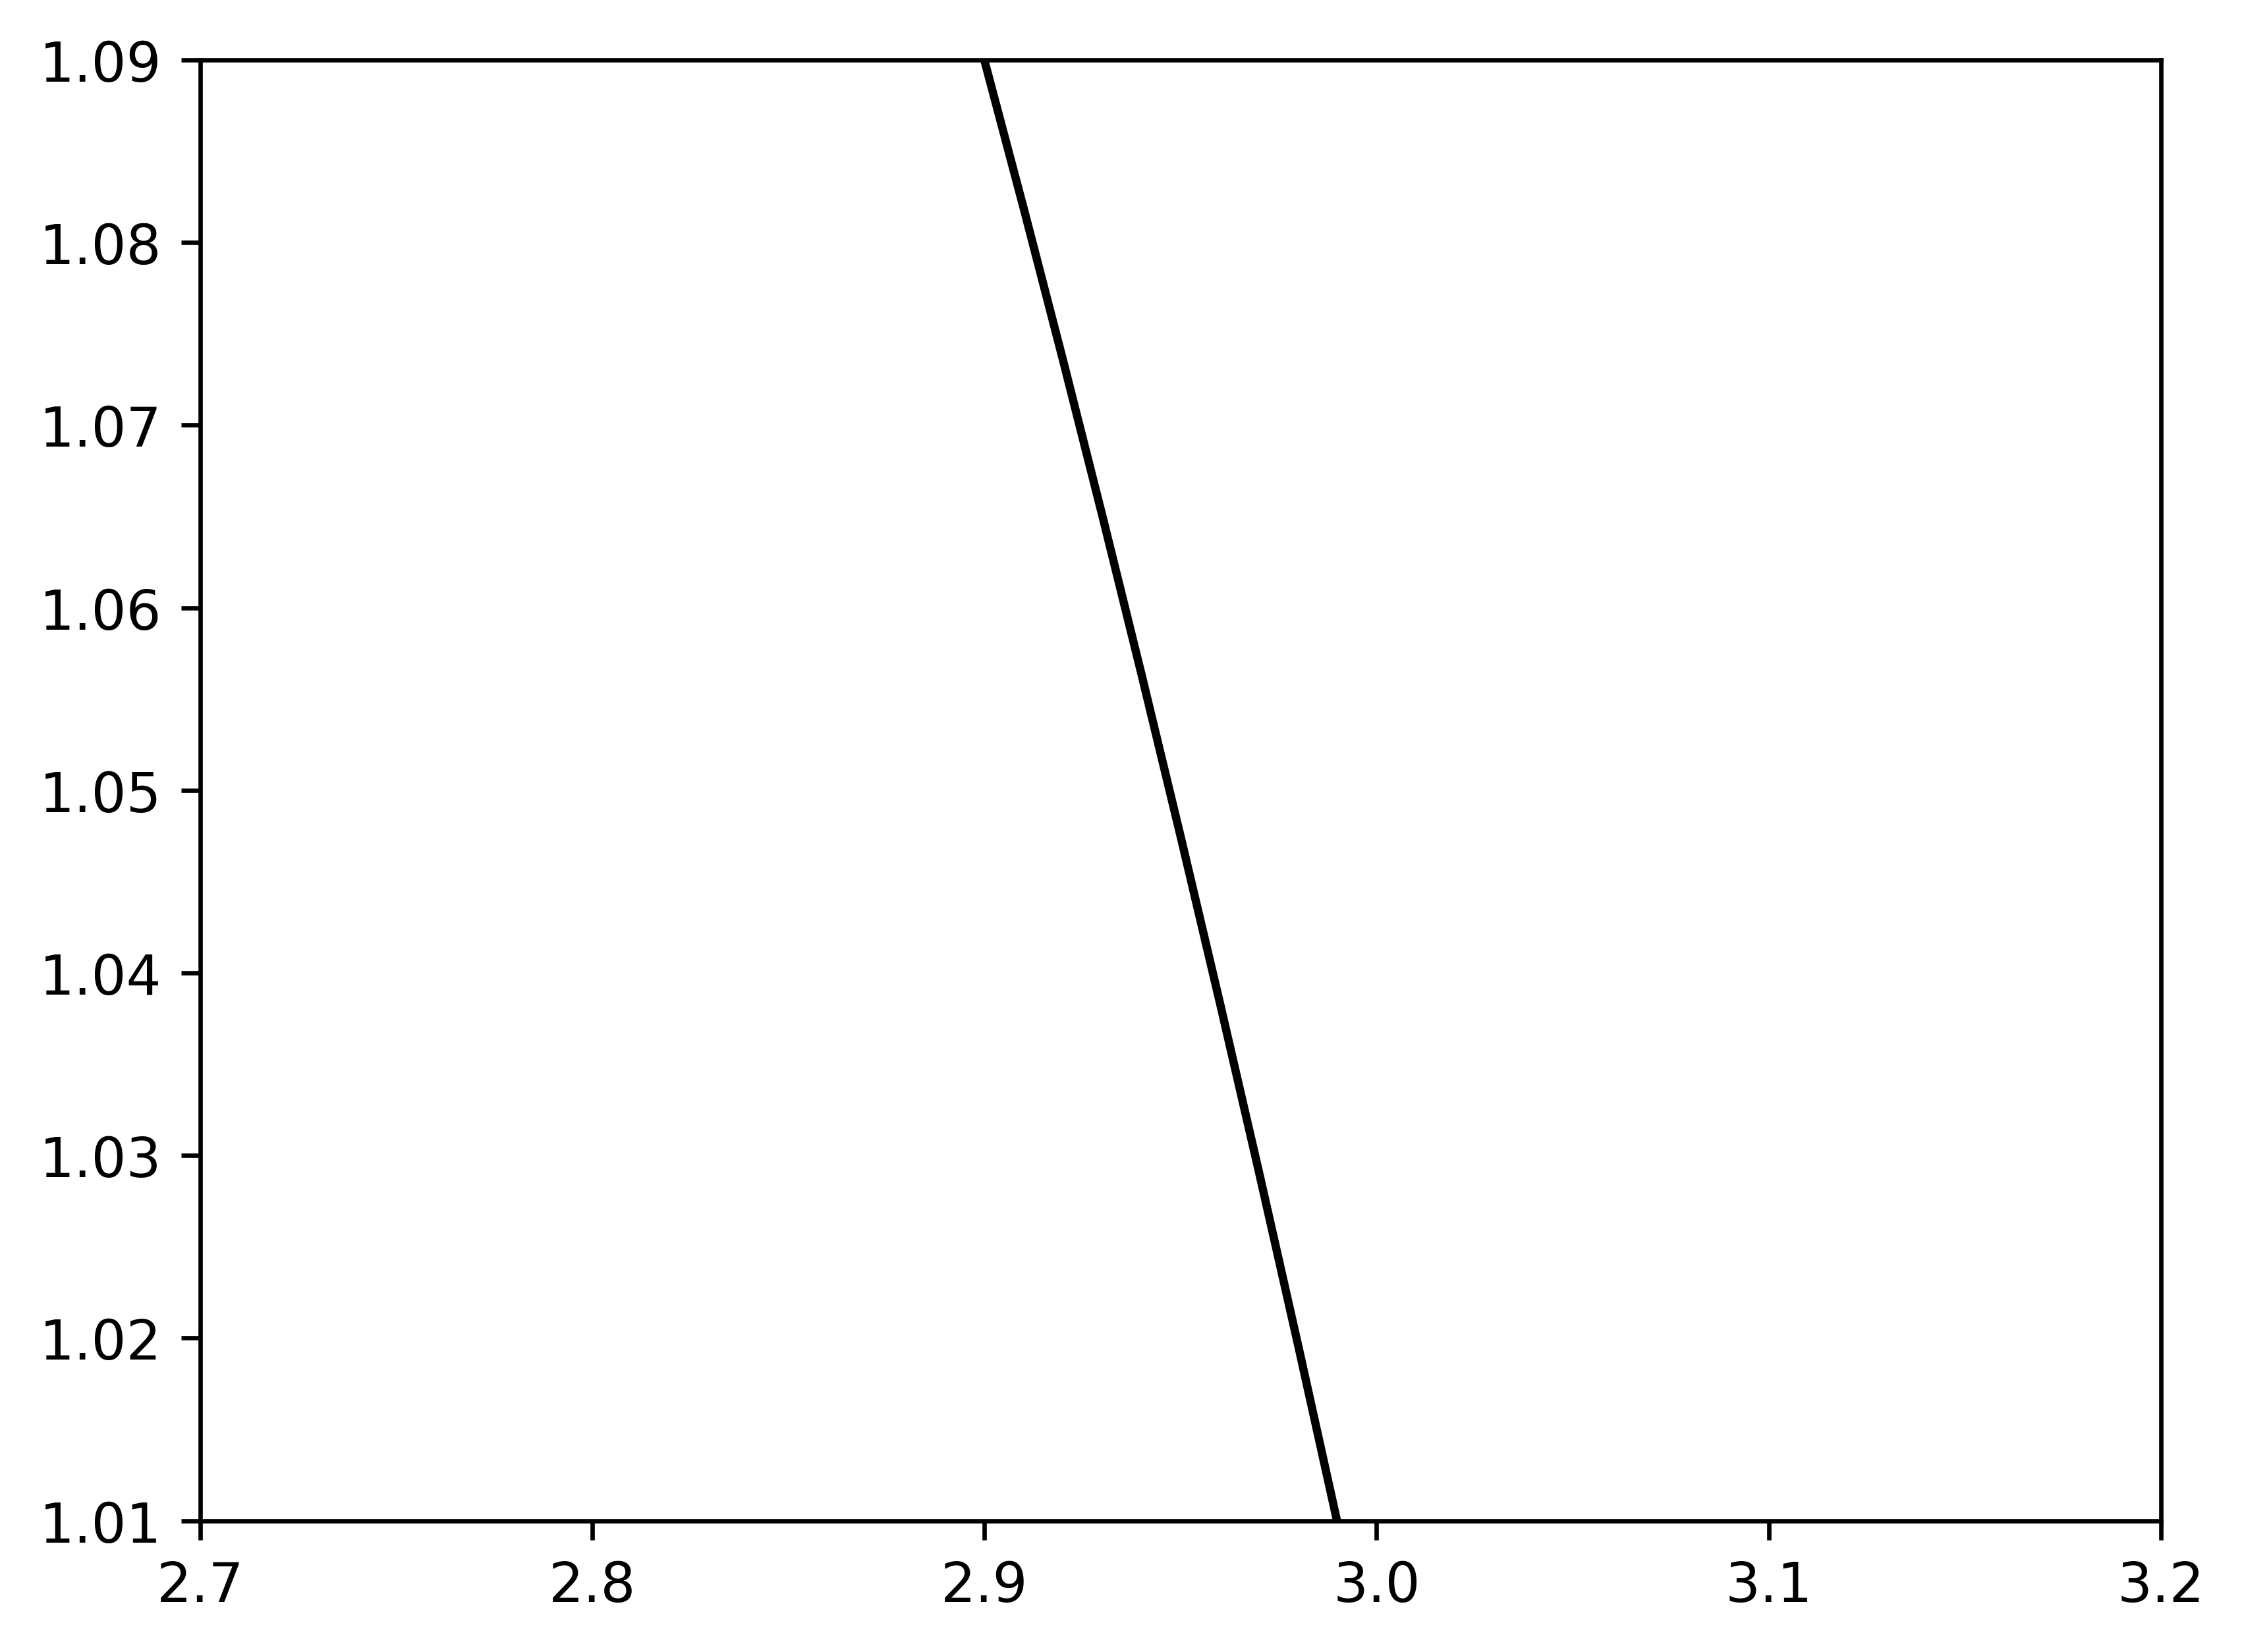

In [11]:
plt.figure(dpi=600)
plt.figure(dpi=600)
plt.plot(J_test, E_plot_A2_Plus, 'k')
plt.plot(J_test, E_plot_A2_Minus, 'k')
plt.plot(J, E_plot_sup[1,:], 'k', linewidth=1)
plt.hlines(1, 2.6, 5.0, 'k')
plt.ylim(1.01, 1.09)
plt.xlim(2.7, 3.2)

(-2.0, 8.0)

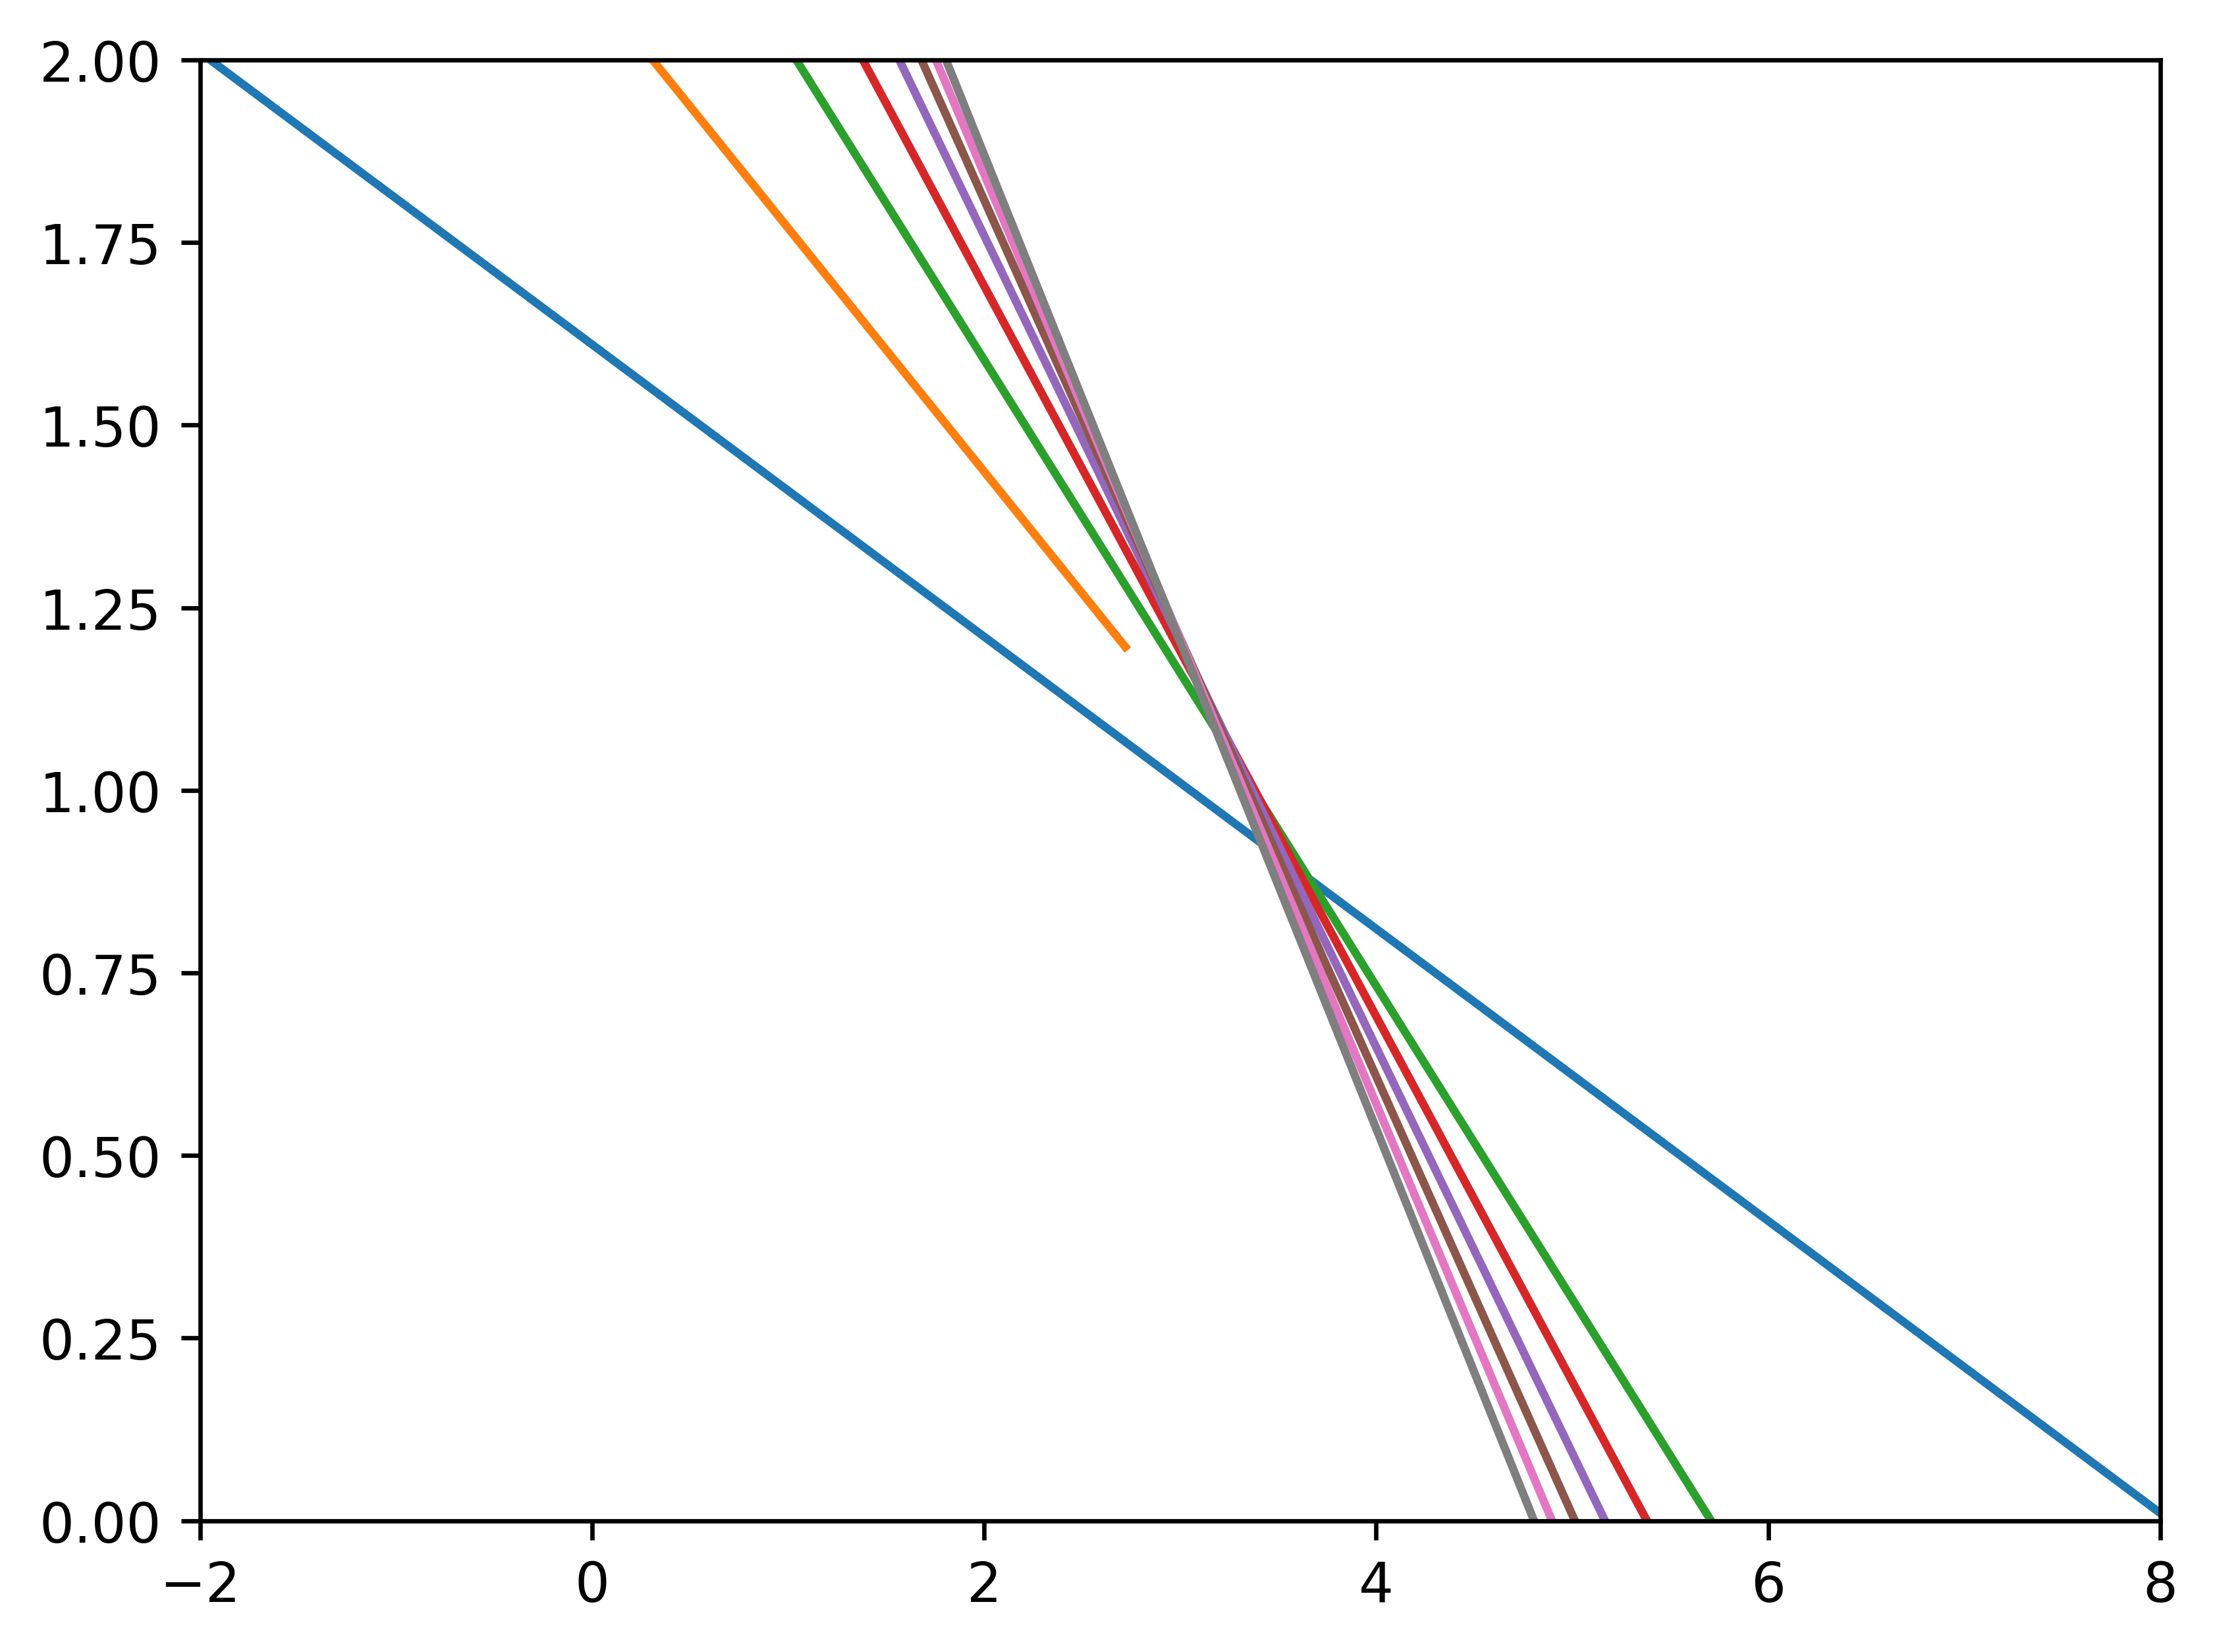

In [12]:
plt.figure(dpi=600)
for i in range(len(alpha_sup)):
    plt.plot(J, E_plot_sup[i,:])
plt.ylim(0,2)
plt.xlim(-2,8.0)